# Analysis 5 : Geographical relation

In [2]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
with open('./data/team_top_scorer.json') as json_data:
    team_top_scorer = json.load(json_data)

In [6]:
stadiums = pd.read_csv('./data/stadiums.csv')

df_team_top_scorer = pd.DataFrame(columns = ['team','top_scorer','goals','stadium','latitude','longitude'], 
                          index = np.arange(0,len(team_top_scorer),1))



for i in range(len(team_top_scorer)):
    df_team_top_scorer.team[i] = team_top_scorer.keys()[i]
    df_team_top_scorer.top_scorer[i] = team_top_scorer.values()[i].keys()[0]
    df_team_top_scorer.goals[i] = team_top_scorer.values()[i].values()[0]
    df_team_top_scorer.stadium[i] = stadiums.Name[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 
    df_team_top_scorer.latitude[i] = stadiums.Latitude[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 
    df_team_top_scorer.longitude[i] = stadiums.Longitude[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 


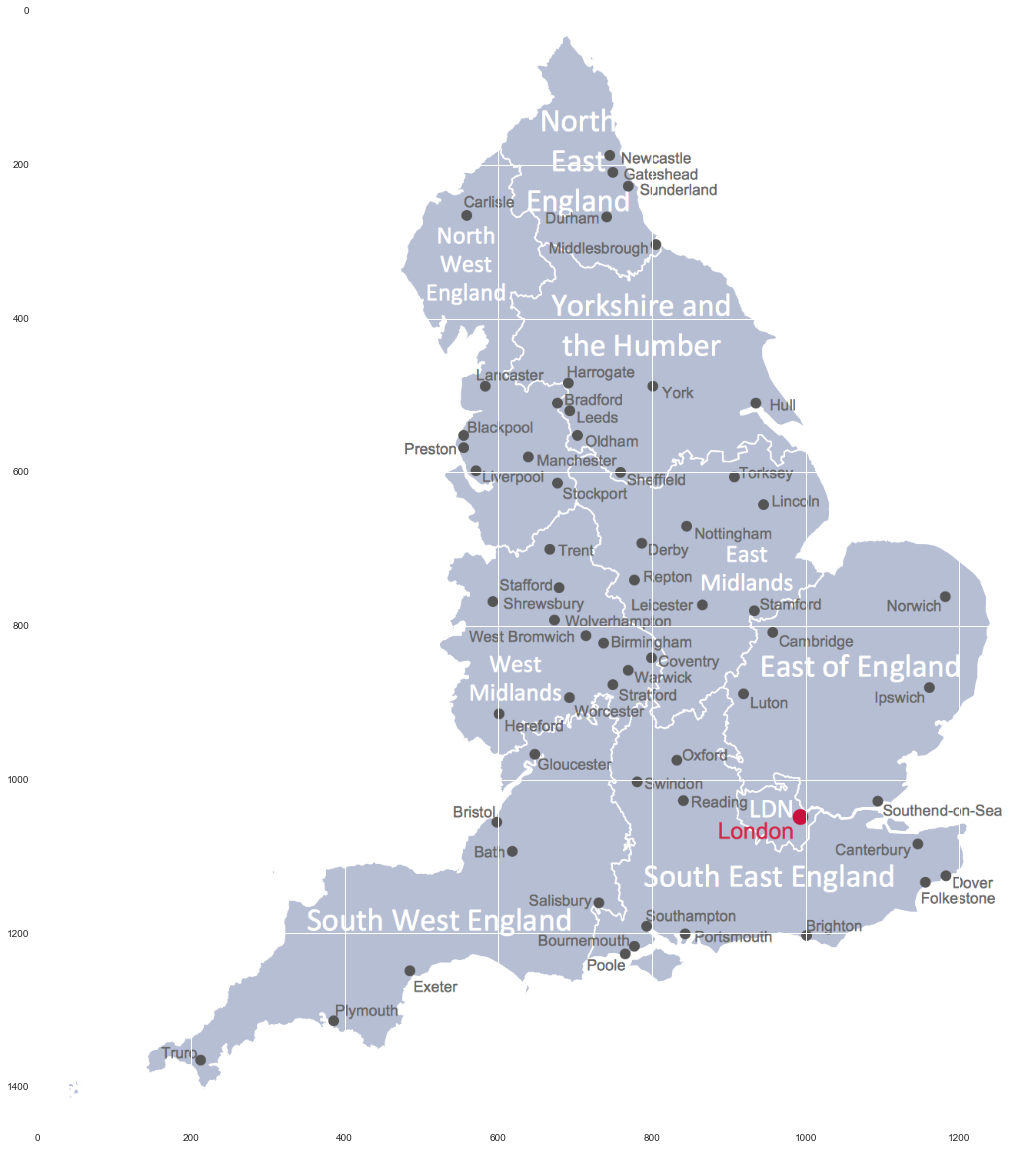

In [219]:
plt.figure(figsize=(20,20))
im = plt.imread('Maps-UK-Map-English-Cities-and-Towns-Map.png')
implot = plt.imshow(im)
plt.show()

In [177]:
with open('./data/season_table.json') as json_data:
    season_table = json.load(json_data)

In [ ]:
rank_avg = {}
for i in season table:
    for j in in season_table[i]:
        rank_avg.setdefault(j,[])
        rank_avg[j].append()

In [183]:
df_table = pd.read_csv('./data/season_team_point_difGoal.csv')
df_table = df_table.drop(['Unnamed: 0'], 1)

In [184]:
df_table.head()

,season,team,pt,dg
0,2001-2002,Charlton Athletic,44.0,-11.0
1,2001-2002,Southampton,45.0,-8.0
2,2001-2002,Manchester United,77.0,42.0
3,2001-2002,Liverpool,80.0,37.0
4,2001-2002,Ipswich Town,36.0,-23.0


In [220]:
rank_avg = {}
for i in sorted(df_table.season.unique()):
    temp = df_table[df_table.season==i]
    temp = temp.reset_index(drop= True)
    temp = temp.sort(['pt','dg'], ascending=[0, 0])
    temp = temp.reset_index(drop= True)
    for j in range(len(temp)):
        rank_avg.setdefault(temp.team[j],[])
        rank_avg[temp.team[j]].append(j+1)
    
rank_avg

C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



{'Arsenal': [1, 2, 1, 2, 4, 4, 3, 4, 3, 4, 3, 4],
 'Aston Villa': [8, 16, 6, 10, 16, 11, 6, 6, 6, 9, 16, 15],
 'Birmingham': [13, 10, 12, 18, 19, 9, 18],
 'Blackburn Rovers': [10, 6, 15, 15, 6, 10, 7, 15, 10, 15, 19],
 'Blackpool': [19],
 'Bolton Wanderers': [16, 17, 8, 6, 8, 7, 16, 13, 14, 14, 18],
 'Burnley': [18],
 'Charlton Athletic': [14, 12, 7, 11, 13, 19],
 'Chelsea': [6, 4, 2, 1, 1, 2, 2, 3, 1, 2, 6, 3],
 'Crystal Palace': [18],
 'Derby County': [19, 20],
 'Everton': [15, 7, 17, 4, 11, 6, 5, 5, 8, 7, 7, 6],
 'Fulham': [13, 14, 9, 13, 12, 16, 17, 7, 12, 8, 9, 12],
 'Hull City': [17, 19],
 'Ipswich Town': [18],
 'Leeds United': [5, 15, 20],
 'Leicester City': [20, 18],
 'Liverpool': [2, 5, 4, 5, 3, 3, 4, 2, 7, 6, 8, 7],
 'Manchester City': [9, 16, 8, 15, 14, 9, 10, 5, 3, 1, 2],
 'Manchester United': [3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1],
 'Middlesboro': [12, 11, 11, 7, 14, 12, 13, 19],
 'Newcastle United': [4, 3, 5, 14, 7, 13, 12, 18, 12, 5, 16],
 'Norwich City': [19, 12, 11],
 'P

In [221]:
for i in rank_avg:
    avg = mean(rank_avg[i])
    rank_avg[i] = avg
    
rank_avg

{'Arsenal': 2.9166666666666665,
 'Aston Villa': 10.416666666666666,
 'Birmingham': 14.142857142857142,
 'Blackburn Rovers': 11.636363636363637,
 'Blackpool': 19.0,
 'Bolton Wanderers': 12.454545454545455,
 'Burnley': 18.0,
 'Charlton Athletic': 12.666666666666666,
 'Chelsea': 2.75,
 'Crystal Palace': 18.0,
 'Derby County': 19.5,
 'Everton': 8.1666666666666661,
 'Fulham': 11.833333333333334,
 'Hull City': 18.0,
 'Ipswich Town': 18.0,
 'Leeds United': 13.333333333333334,
 'Leicester City': 19.0,
 'Liverpool': 4.666666666666667,
 'Manchester City': 8.3636363636363633,
 'Manchester United': 1.75,
 'Middlesboro': 12.375,
 'Newcastle United': 9.9090909090909083,
 'Norwich City': 14.0,
 'Portsmouth': 13.857142857142858,
 'Queens Park Rangers': 18.5,
 'Reading': 15.0,
 'Sheffield United': 18.0,
 'Southampton': 13.0,
 'Stoke City': 12.6,
 'Sunderland': 15.666666666666666,
 'Swansea City': 9.5,
 'Tottenham Hotspur': 7.416666666666667,
 'Watford': 20.0,
 'West Bromwich Albion': 15.0,
 'West Ham U

In [201]:
# save the dictionary in a json file.
with open('./data/average_rank.json', 'w') as outfile:
    json.dump(rank_avg, outfile)

In [209]:
stadiums = pd.read_csv('./data/stadiums.csv')
df_rank_avg = pd.DataFrame(columns = ['team','avg_rank','stadium','latitude','longitude'], 
                          index = np.arange(0,len(team_top_scorer),1))


i=0
for c in rank_avg:
    df_rank_avg.team[i] = c
    df_rank_avg.avg_rank[i] = rank_avg[c]
    df_rank_avg.stadium[i] = stadiums.Name[stadiums.Team == c].reset_index(drop = True).ix[0] 
    df_rank_avg.latitude[i] = stadiums.Latitude[stadiums.Team == c].reset_index(drop = True).ix[0] 
    df_rank_avg.longitude[i] = stadiums.Longitude[stadiums.Team == c].reset_index(drop = True).ix[0]
    i+=1


In [210]:
df_rank_avg.head()

,team,avg_rank,stadium,latitude,longitude
0,Manchester United,1.75,Old Trafford,53.4631,-2.29139
1,Stoke City,12.6,Britannia Stadium,52.9884,-2.17542
2,Watford,20,Vicarage Road,51.6498,-0.401569
3,Burnley,18,Turf Moor,53.7888,-2.23018
4,Aston Villa,10.4167,Villa Park,52.5092,-1.88508


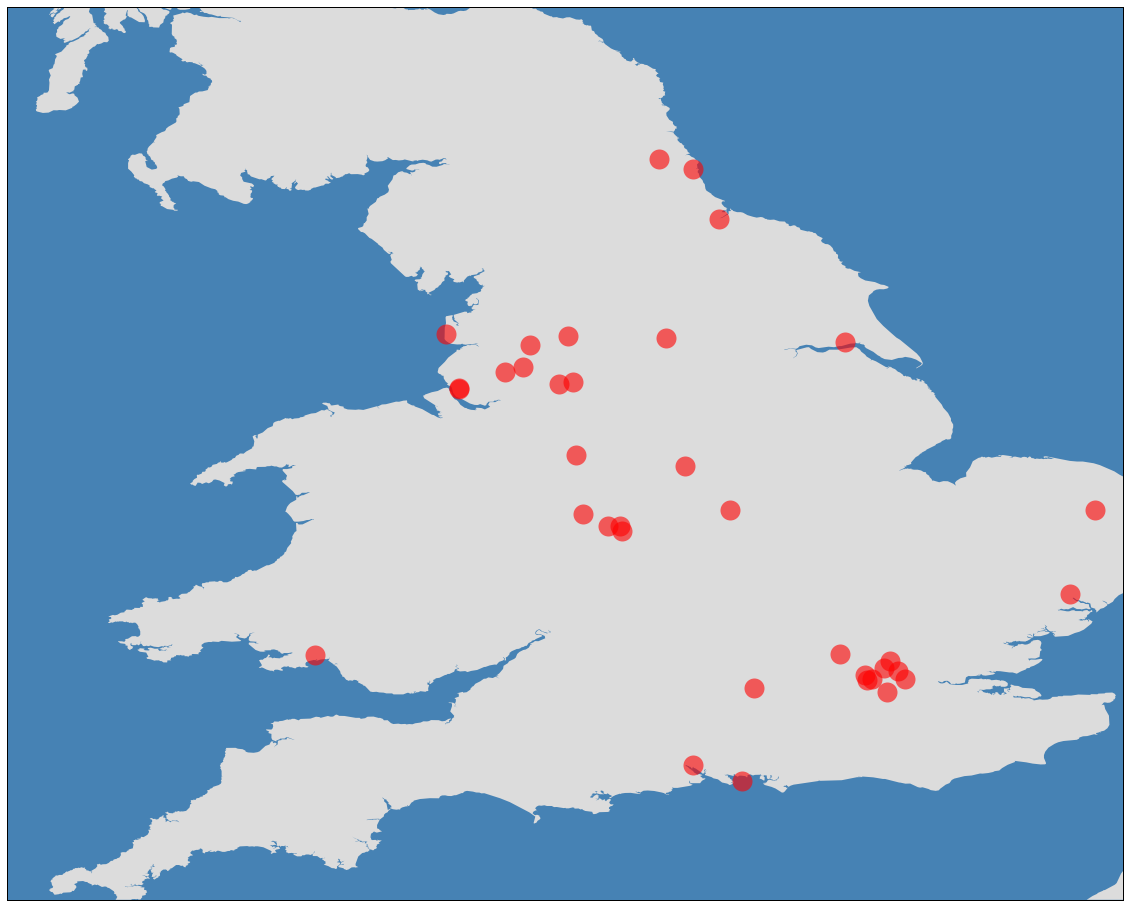

In [217]:
x = df_team_top_scorer.latitude.values[0:-1]
y = df_team_top_scorer.longitude.values[0:-1]
z = df_team_top_scorer.goals.values[0:-1]

col = sns.light_palette("red",39)
plt.figure(figsize=(20,20))

themap = Basemap(
              llcrnrlon = -6,              # lower-left corner longitude
              llcrnrlat = 50,               # lower-left corner latitude
              urcrnrlon = 1.5,               # upper-right corner longitude
              urcrnrlat = 56,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100000.0)

themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')


xx, yy = themap(x, y)


for i in range(len(yy)):
    themap.plot(yy[i], xx[i], 'o', color = 'red', markersize = 20 ,label = 'team',alpha=0.6)

savefig('geo-spread.png')

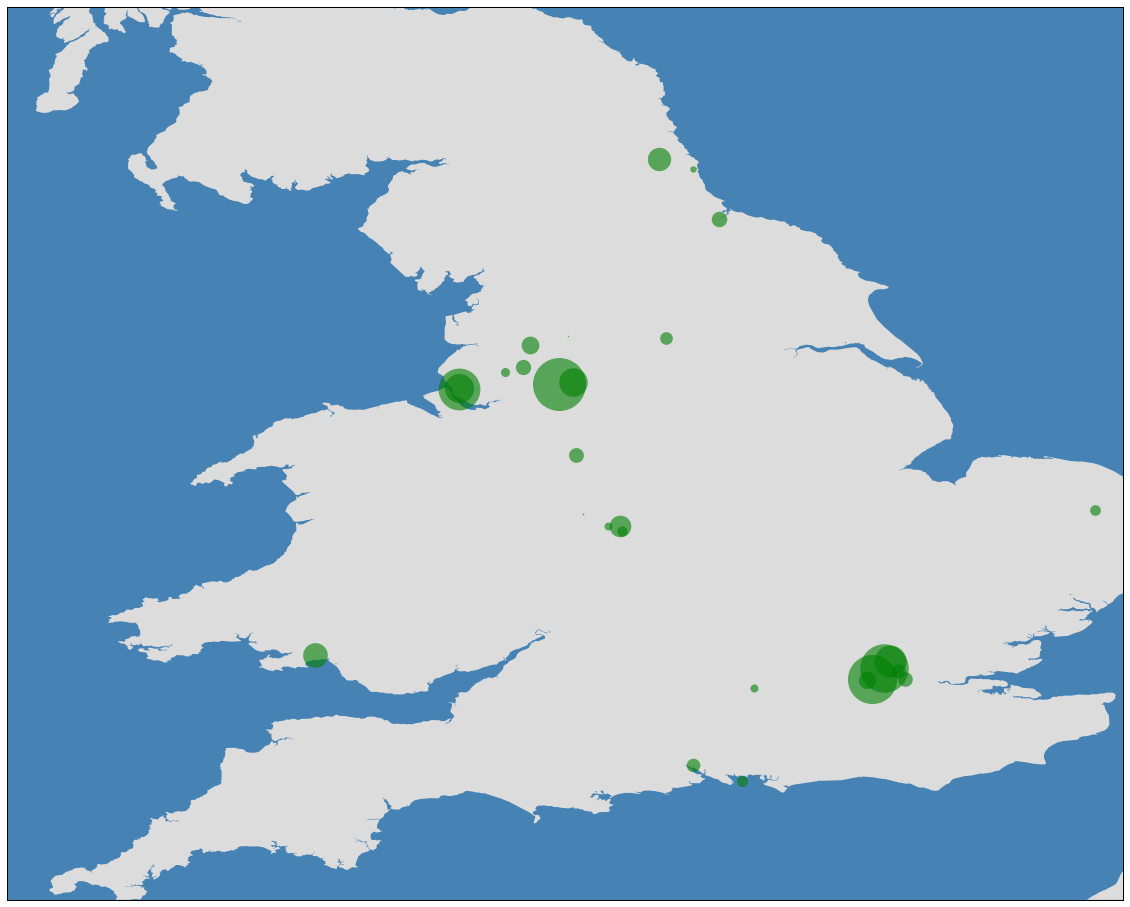

In [214]:
x = df_rank_avg.latitude.values[0:-1]
y = df_rank_avg.longitude.values[0:-1]
z = df_rank_avg.avg_rank.values[0:-1]

col = sns.light_palette("red",39)
plt.figure(figsize=(20,20))

themap = Basemap(
              llcrnrlon = -6,              # lower-left corner longitude
              llcrnrlat = 50,               # lower-left corner latitude
              urcrnrlon = 1.5,               # upper-right corner longitude
              urcrnrlat = 56,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100000.0)

themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

xx, yy = themap(x, y)


for i in range(len(yy)):
    themap.plot(yy[i], xx[i], 'o',  color = 'green',markersize = (20-z[i])*np.log(20-z[i]),label = 'team',alpha=0.6)

savefig('avg_rank_geo.png')